**EII 4220 – Reseña Smart: Análisis Automatizado de Sentimientos**                                                                  
Renato González (21226033-9), David Gonzalez (21300680-0), Anyelo Miranda (21264218-5)

**Preprocesamiento de Datos: Eliminación de Duplicados y Manejo de Valores Nulos en el
Conjunto de Reseñas**


El fragmento de código comienza importando varias bibliotecas esenciales para el análisis y la
visualización de datos. Se utilizan pandas (importado como pd) para la manipulación de datos,
matplotlib.pyplot (como plt) y seaborn (como sns) para crear gráficos y visualizaciones, Counter de
collections para contar elementos, y WordCloud para generar nubes de palabras a partir de texto.
Luego, el módulo files de google.colab permite cargar archivos desde el sistema local a Google Colab,
donde files.upload() abre un diálogo de carga. A continuación, el archivo test.csv se carga en un
DataFrame de pandas llamado df usando pd.read_csv(). Para facilitar el análisis, se renombra las
columnas del DataFrame a Sentiment, Title y Review.
El código muestra las primeras cinco filas del DataFrame con df.head(), proporcionando una vista
preliminar de los datos. A continuación, detecta filas duplicadas usando df.duplicated().sum(), que
cuenta cuántas filas están duplicadas y almacena este número en la variable duplicados. Dependiendo
del resultado, el código elimina las filas duplicadas con df.drop_duplicates() y muestra el total de filas
restantes o, si no hay duplicados, simplemente indica que no se encontraron. La siguiente sección del
código verifica si hay celdas vacías en la columna Review con df['Review'].isnull().values.any(). Si
existen, el código imprime un mensaje, muestra las filas con reseñas vacías, y luego las elimina
utilizando df.dropna(subset=['Review']). Finalmente, realiza una segunda verificación para
asegurarse de que no queden celdas vacías en la columna Review. Si no se encuentran celdas vacías
desde el principio, el código imprime un mensaje indicando que no hay datos faltantes en esa
columna.

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


uploaded=files.upload()
df=pd.read_csv('test.csv')
df.columns = ['Sentiment', 'Title', 'Review']

print(df.head())

duplicados = df.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")

# Si hay duplicados, eliminarlos y mostrar cuántas filas quedan
if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Filas duplicadas eliminadas. Total de filas después de eliminar duplicados: {len(df)}")
else:
    print("No se encontraron filas duplicadas.")

# Verificación de celdas vacías en la columna de reseñas (Review)
if df['Review'].isnull().values.any():
    print("Hay celdas vacías en la columna de reseñas. Eliminando filas con reseñas vacías...")

    # Mostrar las filas que contienen celdas vacías en la columna 'Review'
    empty_cells = df[df['Review'].isnull()]
    print("Filas con reseñas vacías:")
    print(empty_cells)

    # Eliminar filas con reseñas vacías
    df = df.dropna(subset=['Review'])

    # Verificar si aún hay celdas vacías en la columna 'Review'
    if df['Review'].isnull().values.any():
        print("Aún hay celdas vacías en la columna de reseñas después de la eliminación.")
    else:
        print("Todas las reseñas vacías han sido eliminadas.")
else:
    print("No hay celdas vacías en la columna de reseñas.")




Saving test.csv to test.csv
   Sentiment                                              Title  \
0          2  One of the best game music soundtracks - for a...   
1          1                   Batteries died within a year ...   
2          2              works fine, but Maha Energy is better   
3          2                       Great for the non-audiophile   
4          1              DVD Player crapped out after one year   

                                              Review  
0  Despite the fact that I have only played a sma...  
1  I bought this charger in Jul 2003 and it worke...  
2  Check out Maha Energy's website. Their Powerex...  
3  Reviewed quite a bit of the combo players and ...  
4  I also began having the incorrect disc problem...  
Total de filas duplicadas: 0
No se encontraron filas duplicadas.
No hay celdas vacías en la columna de reseñas.


**Preprocesamiento de Texto para Análisis de Sentimientos usando NLP con NLTK**

Se empieza importando librerías esenciales para el procesamiento de lenguaje natural (NLP,
por sus siglas en inglés) y la manipulación de texto. Se utilizan re para manejar expresiones regulares,
nltk (Natural Language Toolkit) para el procesamiento de texto, y string para trabajar con caracteres
de puntuación. La biblioteca nltk se configura al descargar tres recursos: punkt (para la tokenización
de oraciones y palabras), stopwords (una lista de palabras comunes como "the", "and", que no aportan
valor semántico relevante), y wordnet (un diccionario léxico en inglés utilizado para lematización).
La lematización se realiza mediante WordNetLemmatizer de nltk, que simplifica palabras a sus
formas base o de raíz. Luego, se inicializa un conjunto de palabras vacías (stop_words) para eliminar
estas palabras comunes en inglés del texto.
La función preprocess_text se encarga de limpiar y procesar el texto. Primero, convierte el texto a
minúsculas para uniformar las palabras. Después, usa re.sub junto con string.punctuation para
eliminar todos los caracteres de puntuación, reemplazándolos con una cadena vacía. El mismo método
re.sub elimina números, asegurando que solo queden palabras. Posteriormente, word_tokenize de nltk
divide el texto en palabras individuales o "tokens". A continuación, la función filtra estos tokens para
eliminar las palabras vacías, aplicando también la lematización a cada palabra que no sea una palabra
vacía, de manera que las palabras se simplifiquen a sus formas base. Finalmente, los tokens
lematizados se unen de nuevo en una cadena, separadas por espacios, y la función devuelve el texto
limpio.
El código luego aplica esta función de preprocesamiento a la columna Review del DataFrame df,
creando una nueva columna Clean_Review que contiene las reseñas preprocesadas. Esto se hace
utilizando df['Review'].apply(preprocess_text), que aplica preprocess_text a cada elemento en la
columna Review. Finalmente, se muestra una vista previa de las columnas Review y Clean_Review
para verificar el resultado, asegurando que el texto se haya limpiado y procesado correctamente.

In [ ]:

import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar caracteres especiales y puntuación
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Eliminar números
    text = re.sub(r'\d+', '', text)

    # Tokenización
    tokens = word_tokenize(text)

    # Eliminar stopwords y lematización
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]


    return " ".join(tokens)
df['Clean_Review'] = df['Review'].apply(preprocess_text)

# Visualizamos las primeras filas para verificar el resultado
df[['Review', 'Clean_Review']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Review,Clean_Review
0,Despite the fact that I have only played a sma...,despite fact played small portion game music h...
1,I bought this charger in Jul 2003 and it worke...,bought charger jul worked ok design nice conve...
2,Check out Maha Energy's website. Their Powerex...,check maha energy website powerex mhcf charger...
3,Reviewed quite a bit of the combo players and ...,reviewed quite bit combo player hesitant due u...
4,I also began having the incorrect disc problem...,also began incorrect disc problem ive read vcr...


**Análisis Exploratorio de la Longitud de las Reseñas y Distribución de Sentimientos**


Se empieza creando una nueva característica en el DataFrame llamada review_length, que
mide la longitud de cada reseña en términos de palabras. Esto se logra aplicando una función lambda
a la columna Review que divide el texto en palabras usando split() y calcula el número de palabras.
Luego, se calculan estadísticas básicas de esta longitud, como la media, desviación estándar, y los
valores máximos y mínimos. Esto proporciona una visión general de la variabilidad y el rango en la
longitud de las reseñas. A continuación, se realiza un análisis separado de las reseñas positivas y
negativas, filtrando las reseñas según la columna Sentiment. La media y la desviación estándar de la
longitud de las palabras se calculan tanto para las reseñas positivas como para las negativas, lo que
ayuda a identificar diferencias en el estilo o extensión de las reseñas según el sentimiento expresado.
El código también analiza la distribución de las etiquetas de sentimiento en el conjunto de datos.
class_counts = df['Sentiment'].value_counts() cuenta cuántas reseñas pertenecen a cada clase (1 para
negativo y 2 para positivo). Esta información se visualiza mediante un gráfico de barras usando
seaborn (sns.barplot), lo que permite entender el balance de las clases de sentimientos en la base de
datos. Se configura el gráfico con etiquetas y un título para mayor claridad. Posteriormente, el código
utiliza sns.histplot para crear un histograma de la longitud de las reseñas. Se ajusta el tamaño de la
figura y se especifican 50 "bins" para definir la resolución del histograma, y el parámetro kde=True
se utiliza para añadir una estimación de la densidad del núcleo (curva suave) sobre el histograma.
Este gráfico ayuda a visualizar cómo varía la longitud de las reseñas y si existe alguna tendencia
notable.

Media de palabras por reseña: 74.10657276643191
Desviación estándar de palabras por reseña: 42.25796982172907
Número máximo de palabras en una reseña: 217
Número mínimo de palabras en una reseña: 2
Media de longitud para reseñas positivas: 71.20140100700503
Media de longitud para reseñas negativas: 77.01173
Desviación estándar de longitud para reseñas positivas: 42.249852051069624
Desviación estándar de longitud para reseñas negativas: 42.066030834413645


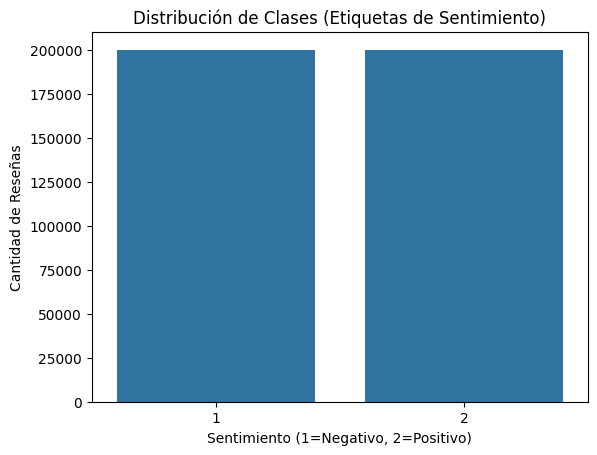

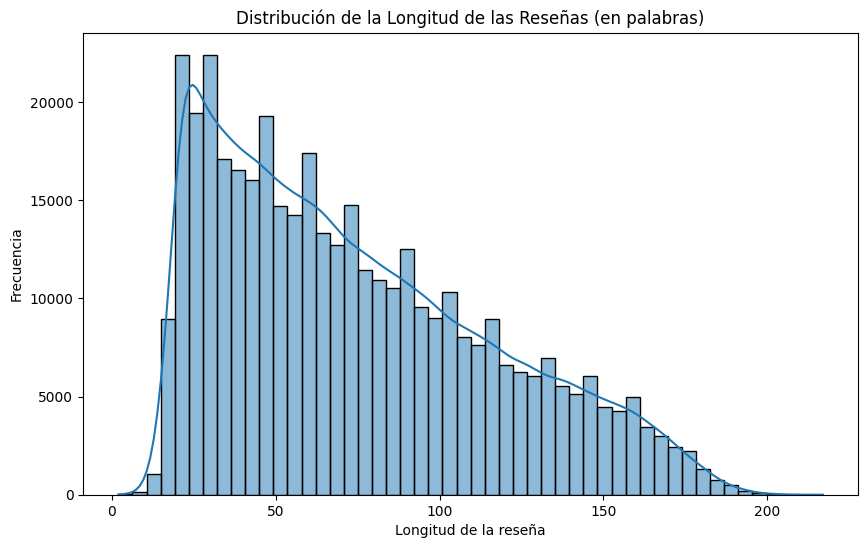

In [ ]:
#dada nuestra base de datos y nuestro proyecto en el que analizamos reseñas no podemos usar una estadistica descriptiva comun y optamos por lo siguiente:

df['review_length'] = df['Review'].apply(lambda x: len(x.split()))
print("Media de palabras por reseña:", df['review_length'].mean())
print("Desviación estándar de palabras por reseña:", df['review_length'].std())
print("Número máximo de palabras en una reseña:", df['review_length'].max())
print("Número mínimo de palabras en una reseña:", df['review_length'].min())

positive_reviews_length = df[df['Sentiment'] == 2]['review_length']
negative_reviews_length = df[df['Sentiment'] == 1]['review_length']

print("Media de longitud para reseñas positivas:", positive_reviews_length.mean())
print("Media de longitud para reseñas negativas:", negative_reviews_length.mean())
print("Desviación estándar de longitud para reseñas positivas:", positive_reviews_length.std())
print("Desviación estándar de longitud para reseñas negativas:", negative_reviews_length.std())


class_counts = df['Sentiment'].value_counts()

sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribución de Clases (Etiquetas de Sentimiento)')
plt.xlabel('Sentimiento (1=Negativo, 2=Positivo)')
plt.ylabel('Cantidad de Reseñas')
plt.show()

df['review_length'] = df['Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribución de la Longitud de las Reseñas (en palabras)')
plt.xlabel('Longitud de la reseña')
plt.ylabel('Frecuencia')
plt.show()



**Nube de Palabras para Reseñas Positivas y Negativas**

Este fragmento de código realiza un análisis usando nubes de palabras para visualizar las palabras
más relevantes de las reseñas positivas y negativas. Primero, se combinan todas las reseñas
preprocesadas (sin palabras vacías) en dos grandes cadenas de texto. Se usa ' '.join() para unir las
reseñas positivas cuando el sentimiento es 2, y las reseñas negativas cuando el sentimiento es 1,
formando dos textos concatenados, positive_reviews y negative_reviews, que servirán como base
para las nubes de palabras.
A continuación, se define una función llamada plot_wordcloud, que recibe como argumentos el texto
y el título del gráfico. Esta función utiliza WordCloud para generar una nube de palabras, configurada
con un ancho de 800 píxeles y un alto de 400 píxeles, mostrando hasta 100 palabras más frecuentes
en un fondo blanco. El método generate() convierte el texto en una representación visual, y luego se
muestra la nube de palabras con matplotlib. La función configura una figura de tamaño 10x6,
visualiza la nube sin mostrar los ejes, y añade un título para describir el contenido.
Finalmente, se llama a plot_wordcloud dos veces: una para las reseñas positivas y otra para las reseñas
negativas. Estas visualizaciones ayudan a identificar las palabras clave que aparecen frecuentemente
en cada tipo de reseña, proporcionando un entendimiento visual inmediato de los temas y sentimientos
predominantes en los datos de texto.

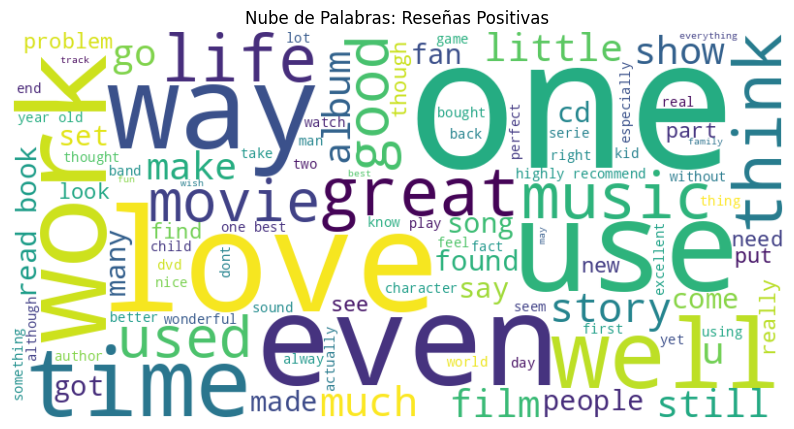

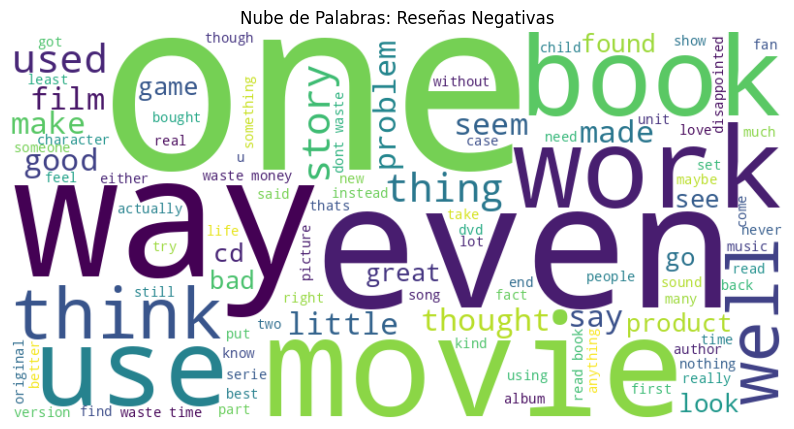

In [ ]:

# analisis eda

# Unimos todas las reseñas positivas y negativas en dos textos grandes, se
# utiliza clean para que la nube sea de palabras relevantes y no de stopwords
positive_reviews = ' '.join(df[df['Sentiment'] == 2]['Clean_Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 1]['Clean_Review'])

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Nube de palabras para las reseñas positivas
plot_wordcloud(positive_reviews, 'Nube de Palabras: Reseñas Positivas')

# Nube de palabras para las reseñas negativas
plot_wordcloud(negative_reviews, 'Nube de Palabras: Reseñas Negativas')




**Análisis de Trigramas: Identificación de Frases Comunes en Reseñas Positivas y Negativas**

Este código utiliza la técnica de extracción de trigramas para analizar las reseñas positivas y negativas
en busca de frases comunes. Se comienza separando las reseñas positivas y negativas de la columna
Review, ya que se necesitan las stopwords (palabras vacías) para interpretar correctamente el contexto
de los trigramas. Luego, se define la función get_top_trigrams, que toma un conjunto de reseñas y un
número top_n (por defecto 10) para devolver los trigramas más frecuentes.
Dentro de la función, se emplea CountVectorizer de sklearn para extraer los trigramas (combinaciones
de tres palabras consecutivas). El parámetro ngram_range=(3, 3) especifica que solo se deben
considerar trigramas, y stop_words='english' asegura que se excluyan las palabras vacías comunes
del inglés, que podrían distorsionar el análisis. El método fit_transform crea una matriz de
documentos con los trigramas, y luego se suman las ocurrencias de cada trigram en la matriz. Los
trigramas más frecuentes se almacenan en una lista trigram_freq, que se ordena de mayor a menor
frecuencia y se devuelve con los top_n trigramas más frecuentes.
El código luego llama a get_top_trigrams dos veces: una para las reseñas positivas y otra para las
negativas. Después, imprime los 10 trigramas más comunes para cada tipo de reseña. Esto ayuda a
identificar patrones o frases clave que aparecen con frecuencia en las reseñas de acuerdo con el
sentimiento, lo que puede proporcionar información adicional sobre las razones detrás de los
sentimientos positivos y negativos expresados por los usuarios.

In [ ]:
#analisis eda

from sklearn.feature_extraction.text import CountVectorizer

# Filtramos las reseñas positivas y negativas, se utiliza review y no clean_review ya que se necesitan stopwords para entender el contexto de triagramas
positive_reviews = df[df['Sentiment'] == 2]['Review']
negative_reviews = df[df['Sentiment'] == 1]['Review']

def get_top_trigrams(reviews, top_n=10):
    # Vectorizador para trigramas
    vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
    trigrams = vectorizer.fit_transform(reviews)

    sum_trigrams = trigrams.sum(axis=0)
    trigram_freq = [(word, sum_trigrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

    trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:top_n]
    return trigram_freq

top_positive_trigrams = get_top_trigrams(positive_reviews, top_n=10)
print("Trigramas más comunes en reseñas positivas:")
for trigram, freq in top_positive_trigrams:
    print(f"{trigram}: {freq}")

top_negative_trigrams = get_top_trigrams(negative_reviews, top_n=10)
print("\nTrigramas más comunes en reseñas negativas:")
for trigram, freq in top_negative_trigrams:
    print(f"{trigram}: {freq}")

Trigramas más comunes en reseñas positivas:
highly recommend book: 946
year old son: 516
does great job: 499
year old daughter: 408
does good job: 403
book ve read: 368
books ve read: 352
really enjoyed book: 332
did great job: 317
highly recommend product: 305

Trigramas más comunes en reseñas negativas:
don waste money: 2519
don waste time: 1484
waste time money: 1319
save money buy: 484
total waste money: 374
complete waste money: 373
waste money time: 358
year old son: 322
book ve read: 316
really looking forward: 292


**Análisis de Diversidad Léxica en Reseñas**

Este fragmento de código calcula la diversidad léxica de las reseñas, una medida que indica la
variedad de palabras usadas en un texto. La función lexical_diversity toma un texto como entrada, lo
divide en palabras usando split(), y luego calcula la diversidad léxica como la relación entre el número
de palabras únicas (utilizando set(words)) y el número total de palabras en el texto. Esta métrica da
una idea de la riqueza léxica de las reseñas, es decir, cuán variadas son las palabras que se usan en
relación con la cantidad total de palabras. Si el texto está vacío o no contiene palabras, la función
devuelve 0 para evitar errores de división por cero.
A continuación, la función lexical_diversity se aplica a la columna Clean_Review del DataFrame df
mediante df['Clean_Review'].apply(lexical_diversity), creando una nueva columna llamada
lexical_diversity. Finalmente, el código imprime la media de diversidad léxica agrupada por el
sentimiento (Sentiment) de las reseñas utilizando groupby('Sentiment')['lexical_diversity'].mean().
Esto permite comparar la diversidad léxica promedio de las reseñas positivas y negativas, ayudando
a entender si las reseñas de un tipo de sentimiento tienden a usar un vocabulario más variado que las
del otro.

In [ ]:
#analisis eda
# análisis de Diversidad Léxica:
def lexical_diversity(text):
    words = text.split()
    if len(words) > 0: # Check to see if there are any words after splitting the text.
        return len(set(words)) / len(words)
    else:
        return 0 # Return 0 to avoid division by zero if there are no words.

df['lexical_diversity'] = df['Clean_Review'].apply(lexical_diversity)
print(df.groupby('Sentiment')['lexical_diversity'].mean())

Sentiment
1    0.894490
2    0.902348
Name: lexical_diversity, dtype: float64


**Análisis Gramatical: Conteo de Partes del Discurso en Reseñas Positivas y Negativas**

Este fragmento de código realiza un análisis gramatical de las reseñas, clasificando las palabras en
diferentes categorías gramaticales o partes del discurso (POS, por sus siglas en inglés), como
sustantivos, adjetivos, verbos y adverbios. El proceso comienza con la descarga de los recursos
necesarios de nltk (punkt para tokenización y averaged_perceptron_tagger para etiquetado de las
partes del discurso). La función count_pos_tags tokeniza cada reseña utilizando nltk.word_tokenize
y luego etiqueta cada token con su parte del discurso correspondiente usando nltk.pos_tag. Las
etiquetas POS se cuentan mediante Counter para calcular la frecuencia de cada tipo de palabra en la
reseña.
Después, la función extract_pos_counts clasifica las palabras etiquetadas en sustantivos, adjetivos,
verbos y adverbios. Esto se hace sumando las frecuencias de las etiquetas correspondientes a cada
categoría (por ejemplo, las etiquetas 'NN' para sustantivos, 'JJ' para adjetivos, etc.). Los resultados se
devuelven como un conjunto de valores que se almacenan en nuevas columnas del DataFrame: nouns,
adjectives, verbs, y adverbs.
Luego, se utiliza groupby('Sentiment') para agrupar las reseñas según su sentimiento y calcular el
conteo total de cada parte del discurso para reseñas positivas y negativas. Esto se imprime para ver
cómo se distribuyen las categorías gramaticales entre los sentimientos. Finalmente, también se calcula
el promedio de las partes del discurso por reseña, para comparar el uso de sustantivos, adjetivos,
verbos y adverbios en reseñas positivas versus negativas. Este análisis proporciona información sobre
qué tipos de palabras predominan en cada tipo de reseña, lo cual puede ser útil para entender mejor
las características lingüísticas de las opiniones positivas y negativas.

In [ ]:
#analisis eda
#análisis gramatical (partes del discurso) para ver qué tipo de palabras predominan en las reseñas positivas y negativas, como sustantivos, adjetivos o verbos.

from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def count_pos_tags(text):
    tokens = nltk.word_tokenize(text)  # Tokenizar el texto en palabras
    pos_tags = nltk.pos_tag(tokens)  # Etiquetar las palabras con POS tags
    pos_counts = Counter(tag for word, tag in pos_tags)  # Contar las etiquetas POS
    return pos_counts

df['pos_counts'] = df['Review'].apply(count_pos_tags)


def extract_pos_counts(pos_counter):
    nouns = sum(pos_counter[tag] for tag in ['NN', 'NNS', 'NNP', 'NNPS'])  # Sustantivos
    adjectives = sum(pos_counter[tag] for tag in ['JJ', 'JJR', 'JJS'])  # Adjetivos
    verbs = sum(pos_counter[tag] for tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])  # Verbos
    adverbs = sum(pos_counter[tag] for tag in ['RB', 'RBR', 'RBS'])  # Adverbios
    return nouns, adjectives, verbs, adverbs

df[['nouns', 'adjectives', 'verbs', 'adverbs']] = df['pos_counts'].apply(lambda pos: pd.Series(extract_pos_counts(pos)))

pos_counts_by_sentiment = df.groupby('Sentiment')[['nouns', 'adjectives', 'verbs', 'adverbs']].sum()
print("Conteo total de partes del discurso por sentimiento:")
print(pos_counts_by_sentiment)

avg_pos_counts_by_sentiment = df.groupby('Sentiment')[['nouns', 'adjectives', 'verbs', 'adverbs']].mean()
print("\nPromedio de partes del discurso por reseña (positivas vs negativas):")
print(avg_pos_counts_by_sentiment)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Conteo total de partes del discurso por sentimiento:
             nouns  adjectives    verbs  adverbs
Sentiment                                       
1          3702894     1263205  2992709  1164840
2          3596590     1281921  2570271   938940

Promedio de partes del discurso por reseña (positivas vs negativas):
              nouns  adjectives      verbs   adverbs
Sentiment                                           
1          18.51447    6.316025  14.963545  5.824200
2          17.98304    6.409637  12.851419  4.694723


**Análisis de la Longitud de las Reseñas por Sentimiento**


Este código visualiza la relación entre la longitud de las reseñas y el sentimiento de las mismas,
usando un gráfico de caja (boxplot). Primero, se crea una nueva columna llamada review_length en
el DataFrame df, que contiene la longitud de cada reseña en términos de número de palabras. Esto se
logra aplicando una función lambda sobre la columna Review que divide cada reseña en palabras
mediante split() y calcula la cantidad de palabras.
Luego, se genera un gráfico de caja usando seaborn.boxplot, donde el eje X representa las clases de
sentimiento (positivas y negativas, en la columna Sentiment), y el eje Y muestra la longitud de las
reseñas (en número de palabras). El gráfico de caja permite observar la distribución de la longitud de
las reseñas para cada tipo de sentimiento, incluyendo la mediana, los cuartiles y posibles valores
atípicos (outliers). Se ajustan las etiquetas de los ejes y se añade un título descriptivo para facilitar la
interpretación del gráfico.

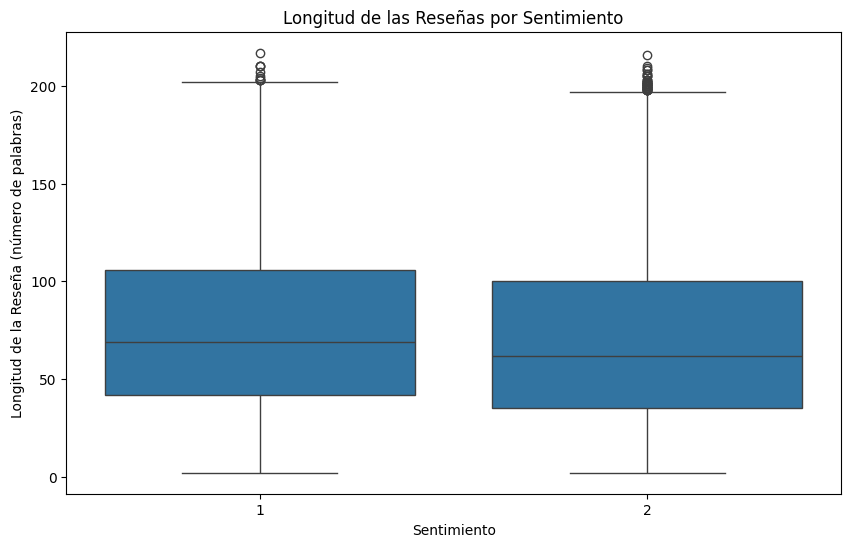

In [ ]:
#analisis eda

import matplotlib.pyplot as plt
import seaborn as sns


df['review_length'] = df['Review'].apply(lambda x: len(x.split()))

# Visualizar la relación entre longitud de reseña y sentimiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='review_length', data=df)
plt.title("Longitud de las Reseñas por Sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Longitud de la Reseña (número de palabras)")
plt.show()


**Análisis de Tópicos en Reseñas usando LDA (Latent Dirichlet Allocation)**

Este fragmento de código realiza un análisis de tópicos en las reseñas utilizando el modelo de Latent
Dirichlet Allocation (LDA). LDA es una técnica de modelado de temas que permite identificar
automáticamente los temas subyacentes en un conjunto de textos. Primero, se utiliza CountVectorizer
para transformar las reseñas en una matriz de características de frecuencia de palabras. El parámetro
max_df=0.95 asegura que se excluyan las palabras que aparecen en más del 95% de las reseñas
(palabras demasiado comunes), y min_df=2 garantiza que solo se incluyan palabras que aparecen en
al menos 2 reseñas, eliminando las que son muy raras.
El modelo LDA se inicializa con n_components=5, lo que significa que se intentará identificar 5
temas principales en las reseñas. El modelo LDA se ajusta a la matriz de características X_topics
usando el método fit. Esto permite al modelo encontrar las distribuciones de tópicos en las reseñas y
las palabras más relevantes para cada tópico.
La función print_top_words toma el modelo entrenado y las palabras de la matriz de características,
y para cada uno de los 5 tópicos encontrados, imprime las 10 palabras más representativas. Estas
palabras clave representan los temas más prominentes en las reseñas, lo que permite interpretar y
entender los principales tópicos de discusión dentro de las reseñas, sin necesidad de etiquetas
explícitas o supervisión manual.

In [ ]:
#analisis eda
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Usamos la columna 'Clean_Review' para el análisis de tópicos, sin stopwords
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X_topics = vectorizer.fit_transform(df['Clean_Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_topics)

# Visualizar los tópicos
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Tópico {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Visualizar las 10 palabras más importantes para cada tópico
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)



Tópico 0:
one like game get would great use product good time
Tópico 1:
one product would work get time bought buy amazon good
Tópico 2:
book read author one would many good reading information page
Tópico 3:
book movie one story read like character good time film
Tópico 4:
cd album song music like one great good sound love


**Vectorización TF-IDF y División de Datos para Modelado Predictivo**


Este fragmento de código utiliza TF-IDF (Term Frequency-Inverse Document Frequency) para
vectorizar las reseñas y dividir los datos en conjuntos de entrenamiento y prueba, para su posterior
uso en un modelo de aprendizaje automático.
Primero, se importa la clase TfidfVectorizer de sklearn.feature_extraction.text y la función
train_test_split de sklearn.model_selection. Se crea un objeto tfidf_vectorizer con el parámetro
max_features=12000, lo que limita el número de características (palabras) a las 12,000 más relevantes
según la métrica TF-IDF. El vectorizador se ajusta a las reseñas de la columna Clean_Review del
DataFrame df, transformando el texto en una matriz dispersa de características, donde cada fila
corresponde a una reseña y cada columna a una palabra seleccionada. La variable X contiene la
representación vectorizada de las reseñas, y el método X.shape imprime la forma de la matriz (número
de reseñas y características).
El vectorizador se utiliza para convertir las reseñas en un formato adecuado para el modelo de
aprendizaje automático. Posteriormente, se extrae la variable Y, que corresponde a las etiquetas de
sentimiento (Sentiment), que será la variable objetivo que se desea predecir.
A continuación, se divide el conjunto de datos en entrenamiento y prueba usando train_test_split, con
un tamaño de prueba del 20% (test_size=0.2). Esto asegura que el modelo se entrene con el 80% de
los datos y se valide con el 20% restante. Finalmente, se imprime la forma de los conjuntos de
entrenamiento y prueba (X_train, X_test, y_train, y_test) para verificar que la división se haya
realizado correctamente y con el tamaño adecuado para ambos subconjuntos.
Este paso es fundamental antes de entrenar un modelo de clasificación, ya que prepara los datos para
ser utilizados en un modelo predictivo, asegurando que haya datos suficientes tanto para entrenar
como para evaluar el desempeño del modelo.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split # Import the missing function


tfidf_vectorizer = TfidfVectorizer(max_features=12000)

X = tfidf_vectorizer.fit_transform(df['Clean_Review'])

print(X.shape)

Y = df['Sentiment']

#división
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Visualizamos la forma de los conjuntos de entrenamiento y prueba
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

(399999, 12000)
X_train shape: (319999, 12000)
X_test shape: (80000, 12000)
y_train shape: (319999,)
y_test shape: (80000,)


**Verificación del Balance de Clases en el Conjunto de Entrenamiento**

Este fragmento de código se enfoca en visualizar la distribución de las clases dentro del conjunto de
entrenamiento para verificar si las clases están equilibradas o si existe un sesgo hacia alguna de ellas.
La variable y_train, que contiene las etiquetas de sentimiento para las reseñas de entrenamiento, es
utilizada para obtener la distribución de las clases mediante el método value_counts(). Este método
cuenta cuántas veces aparece cada clase en los datos de entrenamiento, es decir, cuántas reseñas están
etiquetadas como positivas (Sentiment = 2) y cuántas como negativas (Sentiment = 1).
Luego, se utiliza seaborn.barplot para crear un gráfico de barras que representa la frecuencia de cada
clase en el conjunto de entrenamiento. En el eje X del gráfico se colocan las clases (1 para negativas,
2 para positivas), mientras que en el eje Y se muestra la cantidad de ejemplos de cada clase. Además,
se agregan un título y etiquetas a los ejes para hacer el gráfico más interpretativo.
Este análisis es crucial antes de entrenar un modelo de clasificación, ya que un desbalance de clases
podría afectar negativamente el rendimiento del modelo. Si una clase es mucho más frecuente que la
otra, el modelo podría sesgarse hacia la clase mayoritaria, lo que resultaría en un desempeño
deficiente, especialmente en la predicción de la clase menos representada.

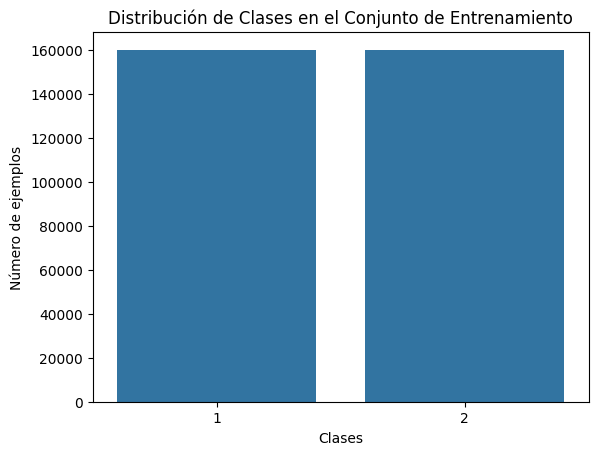

In [ ]:
# Verificación del balance de clases en los datos de entrenamiento
import seaborn as sns
import matplotlib.pyplot as plt


class_distribution = y_train.value_counts()

# Visualizar la distribución de clases
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clases')
plt.ylabel('Número de ejemplos')
plt.show()


**Evaluación del Modelo de Árbol de Decisión usando Validación Cruzada**

En este fragmento de código, se entrena y evalúa un modelo de Árbol de Decisión utilizando
validación cruzada para obtener una estimación más robusta de su desempeño en los datos de
entrenamiento. El modelo de Árbol de Decisión se importa de sklearn.tree y se inicializa con
random_state=42 para garantizar la reproducibilidad de los resultados.
La validación cruzada se realiza usando la función cross_val_score de sklearn.model_selection, la
cual evalúa el modelo mediante 5 pliegues (folds) (cv=5). Esto significa que los datos de
entrenamiento se dividen en 5 subconjuntos (o pliegues), y el modelo es entrenado y evaluado 5 veces,
cada vez usando un pliegue diferente como conjunto de prueba y los otros 4 pliegues como conjunto
de entrenamiento. Esto ayuda a obtener una evaluación más confiable del rendimiento del modelo,
ya que se reduce la posibilidad de sobreajuste a un solo subconjunto de los datos.
El parámetro scoring='accuracy' especifica que la métrica utilizada para evaluar el rendimiento es la
exactitud del modelo, es decir, la proporción de predicciones correctas en comparación con el total
de predicciones. La función devuelve un arreglo con los puntajes de exactitud obtenidos en cada uno
de los 5 pliegues.
Finalmente, se imprime el vector de puntajes (cv_scores_dt) y la exactitud promedio calculada a
partir de esos puntajes. La exactitud promedio se multiplica por 100 y se muestra como un porcentaje,
lo que proporciona una medida clara del rendimiento del modelo en los datos de entrenamiento, antes
de pasar a la etapa de prueba final.


In [ ]:
#entrenamiento con arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Inicializar el modelo de Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Realizar validación cruzada (5 folds) en el conjunto de entrenamiento
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print(f'Puntajes de validación cruzada (Árbol de Decisión): {cv_scores_dt}')
print(f'Exactitud promedio en la validación cruzada (Árbol de Decisión): {cv_scores_dt.mean() * 100:.2f}%')


Puntajes de validación cruzada (Árbol de Decisión): [0.72589063 0.72289063 0.72628125 0.72564063 0.72569884]
Exactitud promedio en la validación cruzada (Árbol de Decisión): 72.53%


**Entrenamiento del Modelo de Árbol de Decisión con el Conjunto de Entrenamiento**

En este fragmento de código, el modelo de Árbol de Decisión (dt_model) previamente definido es
entrenado utilizando el conjunto de datos de entrenamiento X_train y sus correspondientes etiquetas
y_train. El método .fit() es utilizado para ajustar el modelo a los datos. Este método toma dos
argumentos: las características de entrada X_train (la representación vectorizada de las reseñas) y las
etiquetas de salida y_train (los sentimientos asociados con las reseñas, que son las clases a predecir).
Este paso es esencial en el proceso de modelado, ya que es cuando el modelo comienza a "aprender"
de los datos y se prepara para hacer predicciones sobre datos no vistos, como aquellos en el conjunto
de prueba.

In [ ]:
# Entrenar el modelo usando los datos de entrenamiento
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**Evaluación del Modelo de Árbol de Decisión: Matriz de Confusión y Precisión**

Este bloque de código se centra en evaluar el rendimiento del modelo de Árbol de Decisión después
de haber sido entrenado, utilizando varias métricas de desempeño, incluida la matriz de confusión y
la exactitud.
Primero, el modelo realiza predicciones tanto sobre el conjunto de entrenamiento (y_train_pred_dt)
como sobre el conjunto de prueba (y_test_pred_dt) usando el método .predict(). Estas predicciones
se comparan luego con las etiquetas reales para calcular el desempeño del modelo.
Se genera una matriz de confusión para ambos conjuntos: entrenamiento y prueba. La matriz de
confusión muestra cómo el modelo clasificó las instancias en las categorías correctas e incorrectas.
Esta matriz se calcula utilizando la función confusion_matrix de sklearn.metrics, comparando las
etiquetas reales (y_train o y_test) con las predicciones generadas (y_train_pred_dt o y_test_pred_dt).
Para cada conjunto, se crea un gráfico visual de la matriz de confusión utilizando
ConfusionMatrixDisplay, con el parámetro cmap='magma' para darle un esquema de color específico.
A continuación, se calcula la precisión del modelo en el conjunto de prueba utilizando la función
accuracy_score, que mide el porcentaje de predicciones correctas (y_pred_dt == y_test) sobre el total
de predicciones realizadas. Además, se calculan y muestran el total de predicciones, los aciertos y
los errores en el conjunto de prueba.
Finalmente, los resultados (precisión, total de predicciones, aciertos y errores) se imprimen para
ofrecer una visión clara de cuán bien el modelo de Árbol de Decisión ha clasificado las reseñas en el
conjunto de prueba, proporcionando información detallada sobre su desempeño en términos de
predicción y clasificación correcta.

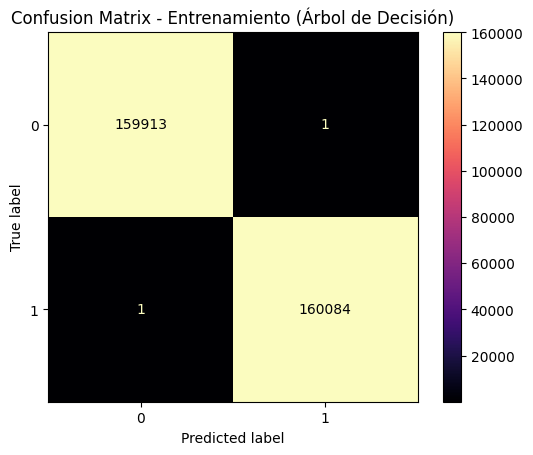

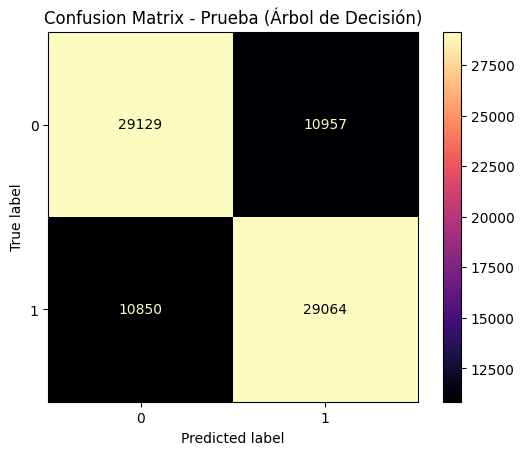

Exactitud en el conjunto de prueba (Árbol de Decisión): 72.74%
Total de predicciones (Árbol de Decisión): 80000
Aciertos (Árbol de Decisión): 58193
Errores (Árbol de Decisión): 21807


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predecir
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Matriz de confusión para el conjunto de entrenamiento
conf_matrix_train_dt = confusion_matrix(y_train, y_train_pred_dt)
disp_train_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train_dt)
disp_train_dt.plot(cmap='magma')
plt.title('Confusion Matrix - Entrenamiento (Árbol de Decisión)')
plt.show()

# Matriz de confusión para el conjunto de prueba
conf_matrix_test_dt = confusion_matrix(y_test, y_test_pred_dt)
disp_test_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test_dt)
disp_test_dt.plot(cmap='magma')
plt.title('Confusion Matrix - Prueba (Árbol de Decisión)')
plt.show()

from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

# Calcular el total de predicciones, aciertos y errores
total_predicciones_dt = len(y_pred_dt)
aciertos_dt = sum(y_pred_dt == y_test)
errores_dt = total_predicciones_dt - aciertos_dt

# Evaluar la precisión en el conjunto de prueba
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Mostrar los resultados por pantalla
print(f"Exactitud en el conjunto de prueba (Árbol de Decisión): {accuracy_dt:.2%}")
print(f"Total de predicciones (Árbol de Decisión): {total_predicciones_dt}")
print(f"Aciertos (Árbol de Decisión): {aciertos_dt}")
print(f"Errores (Árbol de Decisión): {errores_dt}")


**Evaluación del Modelo de Bosque Aleatorio: Validación Cruzada**

Este bloque de código se enfoca en evaluar el desempeño de un modelo de Bosque Aleatorio
(Random Forest) mediante validación cruzada. Primero, se crea una instancia del clasificador
RandomForestClassifier, el cual es un modelo de aprendizaje supervisado que utiliza múltiples
árboles de decisión para mejorar la precisión y reducir el sobreajuste (overfitting). El parámetro
random_state=42 asegura que los resultados sean reproducibles.
La validación cruzada se realiza con la función cross_val_score de sklearn.model_selection, la cual
evalúa el modelo en el conjunto de entrenamiento X_train con sus respectivas etiquetas y_train. La
validación cruzada se lleva a cabo utilizando 5 "folds", lo que significa que los datos de entrenamiento
se dividen en 5 partes iguales, y el modelo es entrenado y evaluado 5 veces, cada vez utilizando un
conjunto diferente como conjunto de prueba y el resto como conjunto de entrenamiento.
El parámetro scoring='accuracy' asegura que la métrica utilizada para evaluar el modelo sea la
exactitud, que mide el porcentaje de predicciones correctas.
Al final, los puntajes de validación cruzada obtenidos para cada uno de los 5 pliegues se muestran en
pantalla, y también se calcula la exactitud promedio de todos los pliegues, lo que proporciona una
medida general del rendimiento del modelo en los datos de entrenamiento. Este tipo de evaluación es
útil para asegurarse de que el modelo sea robusto y no esté sobreajustado a un solo subconjunto de
los datos

In [ ]:
#entrenamiento con randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Inicializar el modelo de RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Realizar validación cruzada (5 folds) en el conjunto de entrenamiento
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print(f'Puntajes de validación cruzada: {cv_scores}')
print(f'Exactitud promedio en la validación cruzada: {cv_scores.mean() * 100:.2f}%')


Puntajes de validación cruzada: [0.83110938 0.83229688 0.83446875 0.8311875  0.83476304]
Exactitud promedio en la validación cruzada: 83.28%


**Entrenamiento del Modelo de Bosque Aleatorio**


En este bloque de código, se entrena el modelo de Bosque Aleatorio (RandomForestClassifier)
utilizando los datos de entrenamiento. El método fit() es utilizado para ajustar el modelo a los datos,
en este caso, el conjunto de características de entrenamiento X_train y sus etiquetas correspondientes
y_train.
Este paso es crucial en el proceso de aprendizaje supervisado, ya que permite al modelo aprender las
relaciones entre las características (en este caso, las reseñas) y las etiquetas de sentimiento (positivas
o negativas). Al ejecutar este método, el modelo construye varios árboles de decisión a partir de los
datos proporcionados y ajusta sus parámetros internos para poder hacer predicciones basadas en el
aprendizaje obtenido.

In [ ]:
# Entrenar el modelo usando los datos de entrenamiento
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Evaluación del Modelo con la Matriz de Confusión (Random Forest)**


En este bloque de código se realiza la evaluación del modelo de Bosque Aleatorio (Random Forest)
utilizando matrices de confusión para verificar su rendimiento tanto en el conjunto de entrenamiento
como en el de prueba. Primero, se generan las predicciones sobre el conjunto de entrenamiento
(y_train_pred_rf) y el conjunto de prueba (y_test_pred_rf) con el modelo entrenado, usando el
método predict() del rf_model. A continuación, la función confusion_matrix() de sklearn.metrics se
utiliza para calcular la matriz de confusión para ambos conjuntos de datos. La matriz de confusión
compara las etiquetas reales de las clases con las predicciones hechas por el modelo, revelando el
número de aciertos y errores cometidos. Para cada conjunto de datos, se calcula una matriz de
confusión que muestra el número de verdaderos positivos (TP), falsos positivos (FP), verdaderos
negativos (TN) y falsos negativos (FN).
Las matrices de confusión son visualizadas utilizando ConfusionMatrixDisplay, lo que proporciona
una representación gráfica para facilitar la interpretación. El parámetro cmap='magma' define un
esquema de colores específico para la visualización. Posteriormente, se añaden títulos a las gráficas
para indicar si la matriz corresponde al conjunto de entrenamiento o al de prueba. Esta visualización
ayuda a entender mejor cómo el modelo ha clasificado las reseñas, mostrando de manera clara los
errores y aciertos en la predicción de las clases positivas y negativas, lo cual es esencial para evaluar
la precisión del modelo en ambos conjuntos de datos.

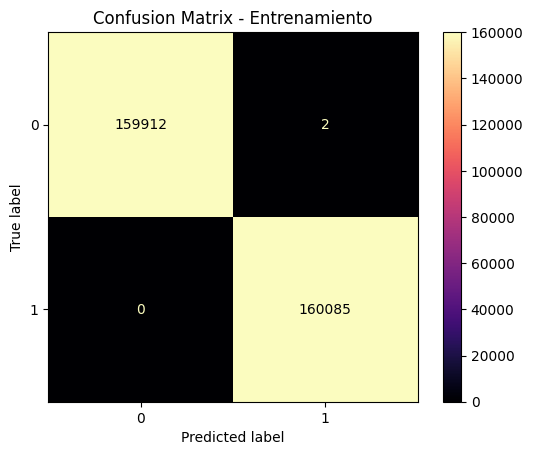

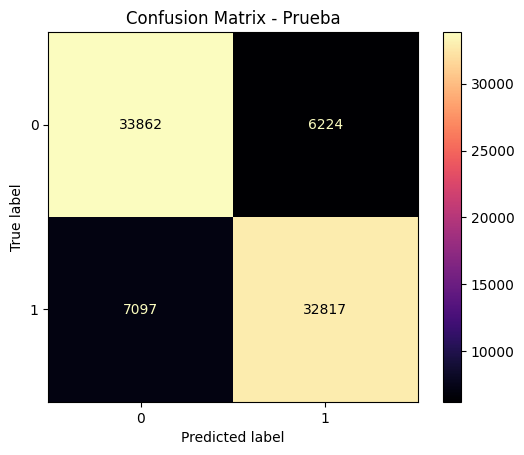

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Matriz de confusión para el conjunto de entrenamiento
conf_matrix_train = confusion_matrix(y_train, y_train_pred_rf)
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train)
disp_train.plot(cmap='magma')
plt.title('Confusion Matrix - Entrenamiento')
plt.show()

# Matriz de confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, y_test_pred_rf)
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp_test.plot(cmap='magma')
plt.title('Confusion Matrix - Prueba')
plt.show()


**Evaluación del Modelo Random Forest: Exactitud y Análisis de Predicciones en el Conjunto
de Prueba**


Este bloque de código evalúa el rendimiento del modelo de Random Forest en el conjunto de prueba,
específicamente midiendo la exactitud del modelo. Se comienza con la predicción de las etiquetas
del conjunto de prueba (y_pred) utilizando el método predict() del modelo entrenado (rf_model).
Luego, se calculan varios valores importantes para evaluar el rendimiento del modelo: el total de
predicciones realizadas (total_predicciones), la cantidad de predicciones correctas (aciertos), y la
cantidad de errores cometidos (errores), que se obtiene restando los aciertos del total de predicciones.
A continuación, se utiliza la función accuracy_score() de sklearn.metrics para calcular la precisión
del modelo, que es la proporción de predicciones correctas con respecto al total de predicciones
realizadas. Esta precisión se presenta como un porcentaje con dos decimales ({accuracy:.2%}).
Finalmente, se imprimen los resultados obtenidos: la exactitud del modelo en el conjunto de prueba,
el número total de predicciones realizadas, los aciertos y los errores cometidos durante la predicción.
Esta evaluación es esencial para comprender el rendimiento del modelo en datos no vistos durante el
entrenamiento y para comparar su efectividad en la tarea de clasificación.

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)
# Calcular el total de predicciones, aciertos y errores
total_predicciones = len(y_pred)
aciertos = sum(y_pred == y_test)
errores = total_predicciones - aciertos

# Evaluar la precisión en el conjunto de prueba
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Mostrar los resultados por pantalla
print(f"Exactitud en el conjunto de prueba: {accuracy:.2%}")  # Now 'accuracy' is defined
print(f"Total de predicciones: {total_predicciones}")
print(f"Aciertos: {aciertos}")
print(f"Errores: {errores}")

Exactitud en el conjunto de prueba: 83.35%
Total de predicciones: 80000
Aciertos: 66679
Errores: 13321
